You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.**

In [3]:
df=pd.read_csv('diabetes.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()
## there is no null value in dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Glucose, BloodPressure, SkinThicknes, BMI are not possible to be zero
# so we remove zero value wiht mean value
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())


<Axes: >

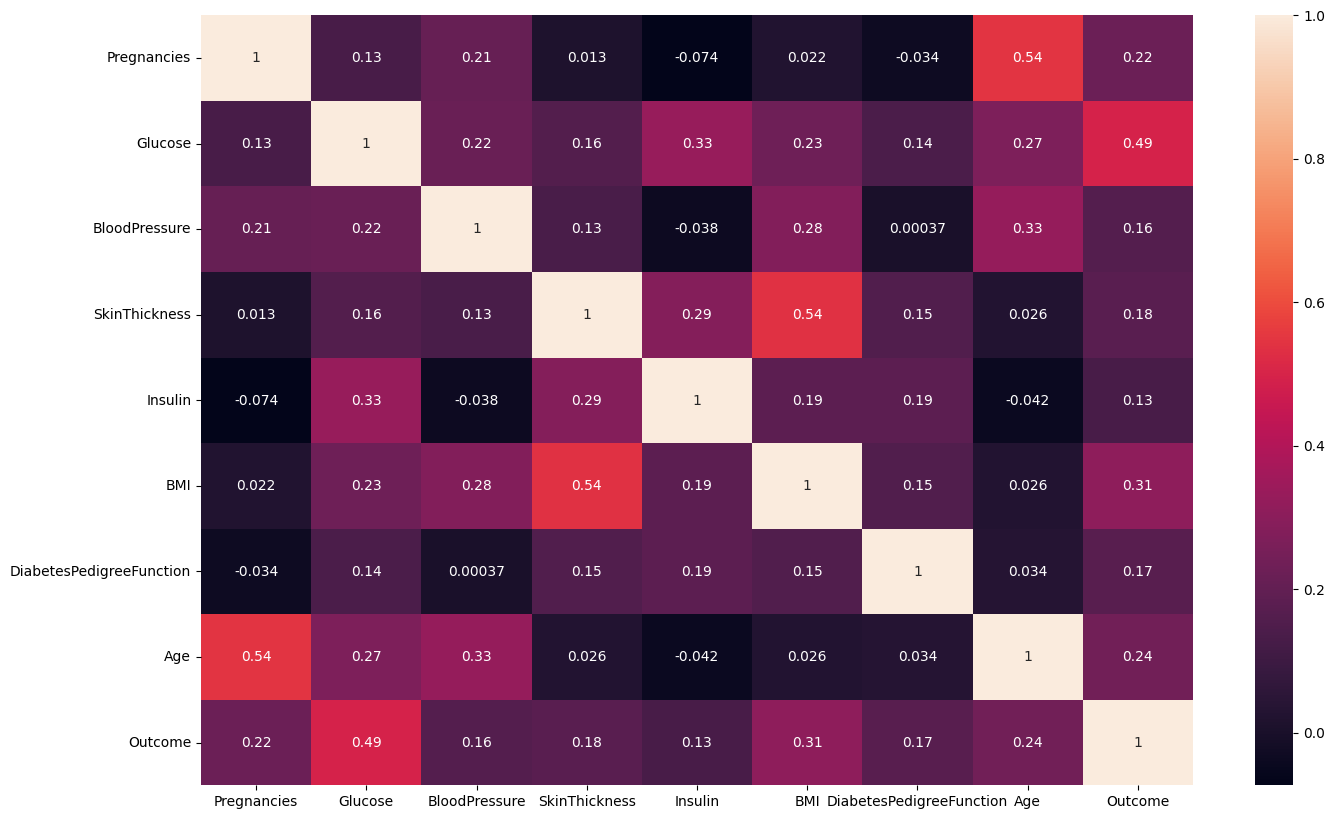

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

<Axes: >

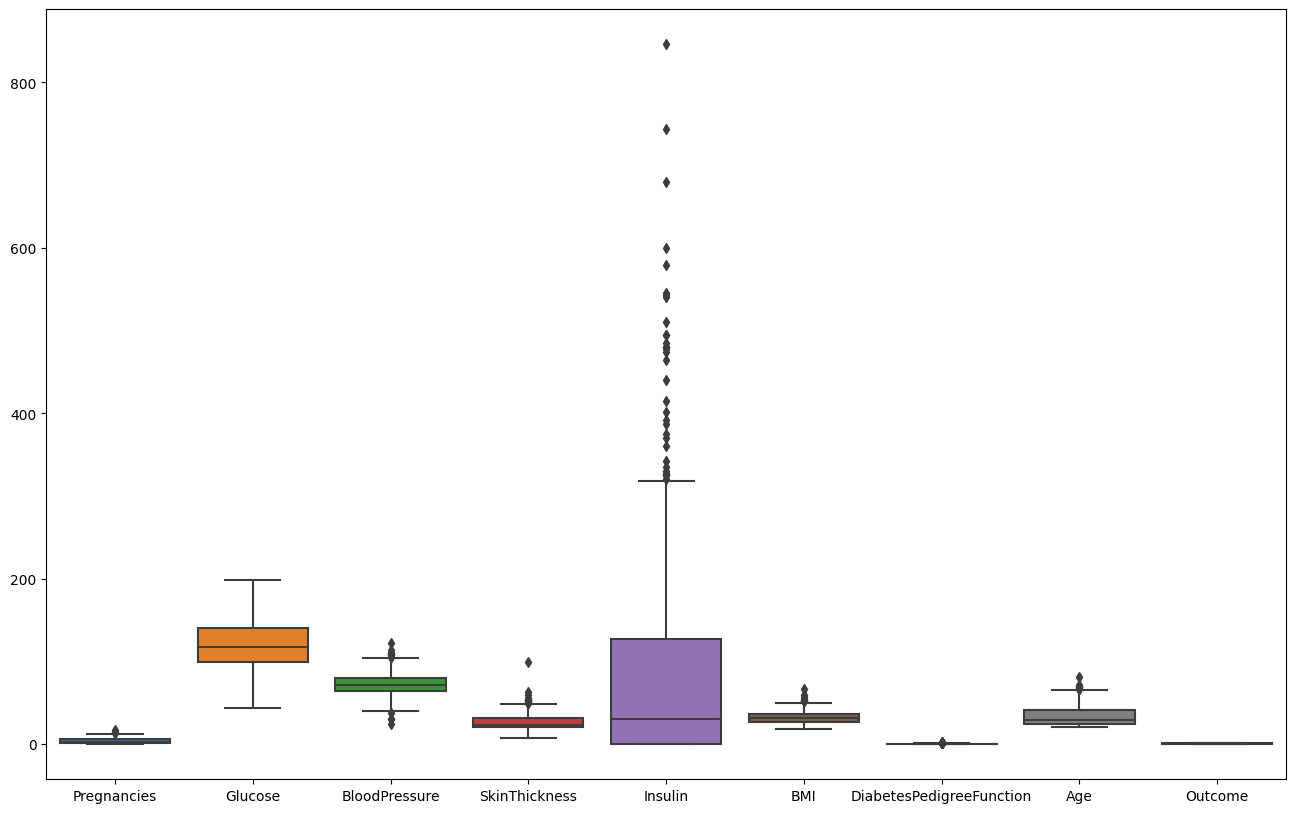

In [9]:
plt.figure(figsize=(16,10))
sns.boxplot(df)

**Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.**

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [11]:
df.isnull().sum()
# data have not any missing value.


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# insulin have outlier 

Q1 = df[['Insulin']].quantile(0.25)
Q3 = df[['Insulin']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[['Insulin']] < lower_bound) | (df[['Insulin']] > upper_bound)).any(axis=1)
# Remove outliers
df = df[~outliers]

<Axes: >

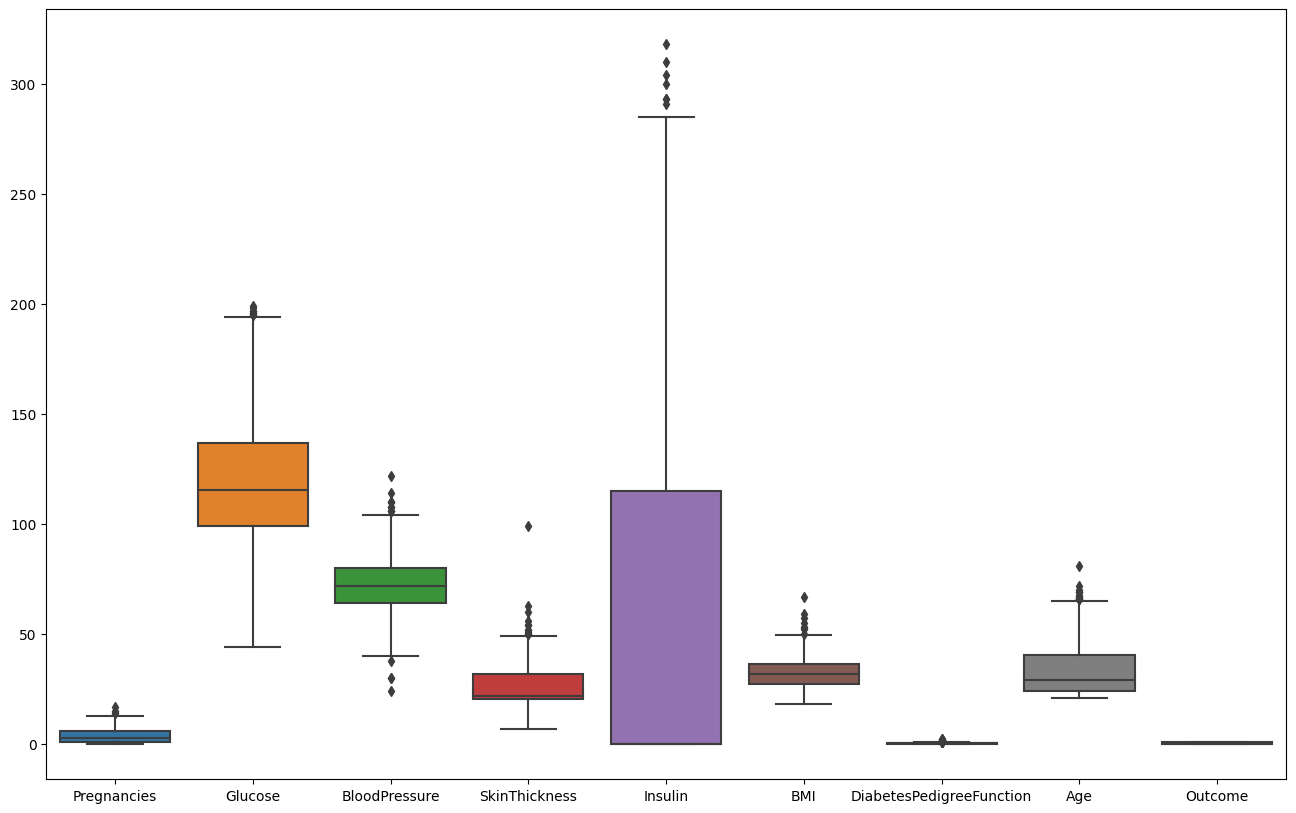

In [13]:
plt.figure(figsize=(16,10))
sns.boxplot(df)

**Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.**



In [14]:
# independent data and dependent data
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
# train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
# # scalling input dataset

# from sklearn.preprocessing import StandardScaler

# scaler=StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

# we dont need to scalling data because decision tree classfication generate output by comparision 
# node values

**Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Us cross-validation to optimize the hyperparameters and avoid overfitting.**

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [18]:
treeclassifier=DecisionTreeClassifier()
clf=GridSearchCV(DecisionTreeClassifier(),param_grid=parameter,cv=5,scoring='accuracy')

In [19]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [20]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [21]:
y_test_pred=clf.predict(X_test)
y_test_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0], dtype=int64)

**Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.**



In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

score=accuracy_score(y_test,y_test_pred)
score

0.7285067873303167

In [23]:
conf_mat=confusion_matrix(y_test,y_test_pred)
conf_mat

array([[128,  17],
       [ 43,  33]], dtype=int64)

In [24]:
report=classification_report(y_test,y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       145
           1       0.66      0.43      0.52        76

    accuracy                           0.73       221
   macro avg       0.70      0.66      0.67       221
weighted avg       0.72      0.73      0.71       221



**Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.**




In [38]:
treeclassifier=DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 2,
 max_features= 'log2',
 splitter= 'best')
treeclassifier.fit(X_train,y_train)
y_pred=treeclassifier.predict(X_test)

In [39]:
from sklearn.metrics import r2_score
accuracy_score(y_test,y_pred)

0.751131221719457

[Text(0.5, 0.8333333333333334, 'x[1] <= 127.5\nentropy = 0.922\nsamples = 513\nvalue = [340, 173]'),
 Text(0.25, 0.5, 'x[5] <= 26.45\nentropy = 0.692\nsamples = 340\nvalue = [277, 63]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.094\nsamples = 83\nvalue = [82, 1]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.797\nsamples = 257\nvalue = [195, 62]'),
 Text(0.75, 0.5, 'x[2] <= 97.0\nentropy = 0.946\nsamples = 173\nvalue = [63, 110]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.956\nsamples = 167\nvalue = [63, 104]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]')]

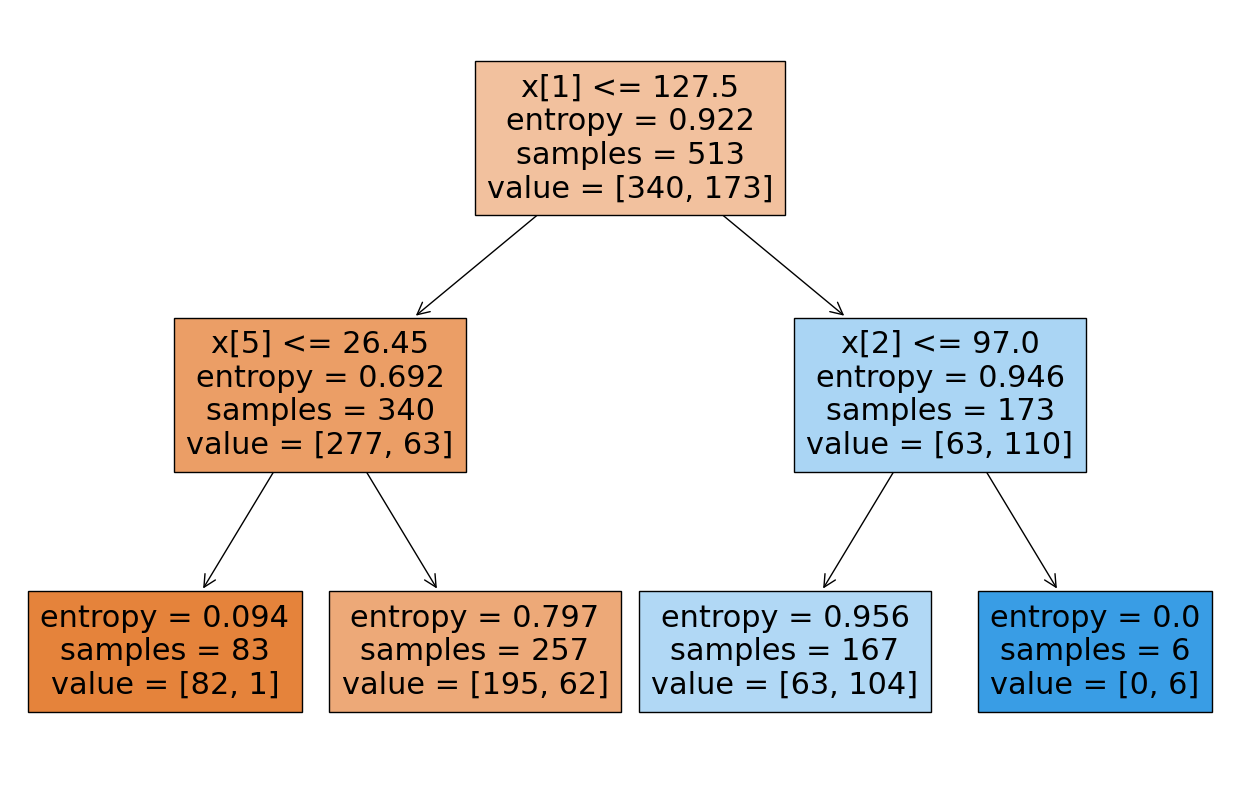

In [33]:
from sklearn import tree

plt.figure(figsize=(16,10))
tree.plot_tree(treeclassifier,filled=True)

In [40]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
560,6,125.0,76.0,20.536458,0,33.8,0.121,54
272,3,122.0,78.0,20.536458,0,23.0,0.254,40
142,2,108.0,52.0,26.000000,63,32.5,0.318,22
237,0,179.0,90.0,27.000000,0,44.1,0.686,23
720,4,83.0,86.0,19.000000,0,29.3,0.317,34


Most important features are Glucose, BloddPressure and BMI. If is less than 127.5 then check BMI is less than 26.42 or not. if BMI is less than 26.42 then its non diabetic otherwise its also non diabetics but probability is less. If Glucose greater than 127.5 then check BloodPressure. if BloodPressure is greater than 97 then person diabetics otherwise probability is low of diabetic 

**Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.**



In [41]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))



0.751131221719457
[[133  12]
 [ 43  33]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       145
           1       0.73      0.43      0.55        76

    accuracy                           0.75       221
   macro avg       0.74      0.68      0.69       221
weighted avg       0.75      0.75      0.73       221



By following these steps, you can develop a comprehensive understanding of decision tree modeling and
its applications to real-world healthcare problems. Good luck!